**DATA UNDERSTANDING**

In [ ]:
#IMPORT NECESSARY LIBRARIES

import pandas as pd             # For working with tabular data (DataFrames)
import numpy as np              # For numerical computations (arrays, math ops)
import matplotlib.pyplot as plt # For static 2D visualizations
import seaborn as sns           # For statistical and elegant plots (built on matplotlib)
import plotly.express as px     # For quick interactive charts
import plotly.graph_objects as go # For detailed, customizable interactive charts
from plotly.subplots import make_subplots # For creating multi-plot figures/dashboards
import warnings
warnings.filterwarnings('ignore') # Ignore non-critical warnings for cleaner output

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


In [ ]:
#LOAD DATASET
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
#INITIAL DATA EXPLORATION

# Basic dataset information
# f function can output a string-values statement.
# df.shape would normally output a list of rows and column in this form (x,y)
# using [0], [1] outputs the rows and columns seperately.
#.info gives a summary of the data, number of rows, columns, names of columns
#.values_counts() counts the unique entires in the columns
#adding (normalize = True) converts it to proportions

# https://docs.google.com/document/d/1hKOCepKS9wpoYOjAvE5Sk40R6DWfqKfTpLOm9MPW3Dk/edit?usp=sharing



print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print(df.info())
print(df.head())
print(df.tail())
print(df['Churn'].value_counts())
print("\nChurn Percentage:")
print(df['Churn'].value_counts(normalize=True) * 100)


Rows: 7,043
Columns: 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

In [ ]:
#DATA QUALITY ASSESSMENT

# Missing values analysis
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if missing_df.empty:
    print("No missing values found!")
else:
    print(missing_df)



No missing values found!


In [ ]:
# Duplicate rows check
print(f"\n DUPLICATE ROWS: {df.duplicated().sum()}")

# Data types analysis
print("\n DATA TYPES:")
dtype_df = pd.DataFrame({
    'Column': df.dtypes.index,
    'Data_Type': df.dtypes.values,
    'Unique_Values': [df[col].nunique() for col in df.columns],
    'Sample_Values': [list(df[col].unique()[:5]) for col in df.columns]
})
print(dtype_df)


 DUPLICATE ROWS: 0

 DATA TYPES:
              Column Data_Type  Unique_Values                                      Sample_Values
0         customerID    object           7043  [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
1             gender    object              2                                     [Female, Male]
2      SeniorCitizen     int64              2                                             [0, 1]
3            Partner    object              2                                          [Yes, No]
4         Dependents    object              2                                          [No, Yes]
5             tenure     int64             73                                  [1, 34, 2, 45, 8]
6       PhoneService    object              2                                          [No, Yes]
7      MultipleLines    object              3                        [No phone service, No, Yes]
8    InternetService    object              3                             [DSL, Fiber optic, 

In [ ]:
print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)

# Numerical features summary
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'customerID' in numerical_cols:
    numerical_cols.remove('customerID')  # Remove ID column if present

print("\n NUMERICAL FEATURES SUMMARY:")
if numerical_cols:
    print(df[numerical_cols].describe())
else:
    print("No numerical features found (excluding ID columns)")

# Categorical features summary
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')  # Remove ID column if present

print(f"\n CATEGORICAL FEATURES ({len(categorical_cols)} features):")
for col in categorical_cols:
    print(f"\n {df[col].value_counts(dropna=False).head()}")


STATISTICAL SUMMARY

 NUMERICAL FEATURES SUMMARY:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

 CATEGORICAL FEATURES (17 features):

 gender
Male      3555
Female    3488
Name: count, dtype: int64

 Partner
No     3641
Yes    3402
Name: count, dtype: int64

 Dependents
No     4933
Yes    2110
Name: count, dtype: int64

 PhoneService
Yes    6361
No      682
Name: count, dtype: int64

 MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

 InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, 


VISUALIZATION 1: TARGET VARIABLE DISTRIBUTION


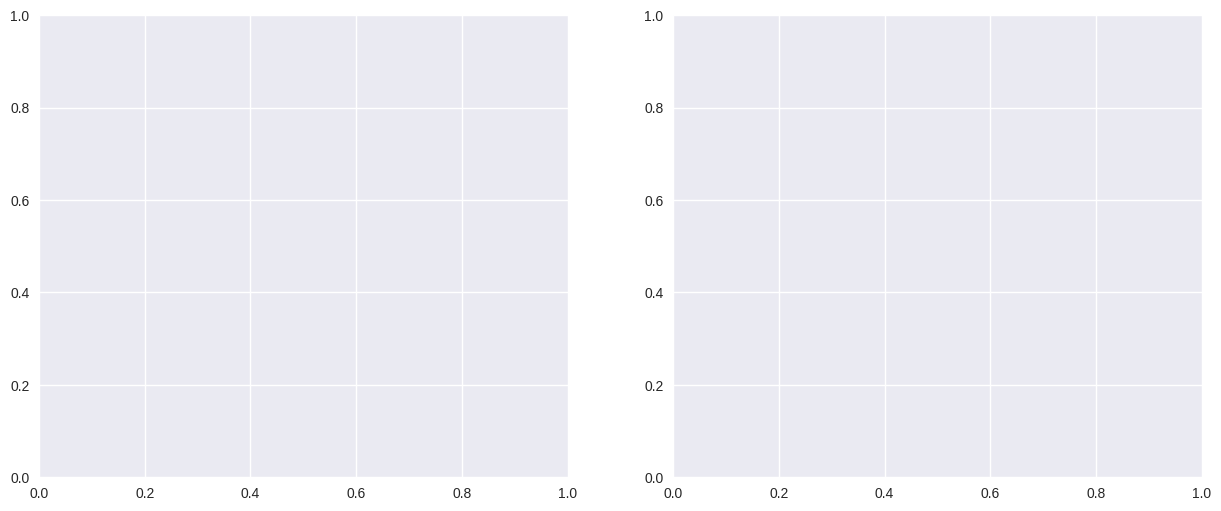

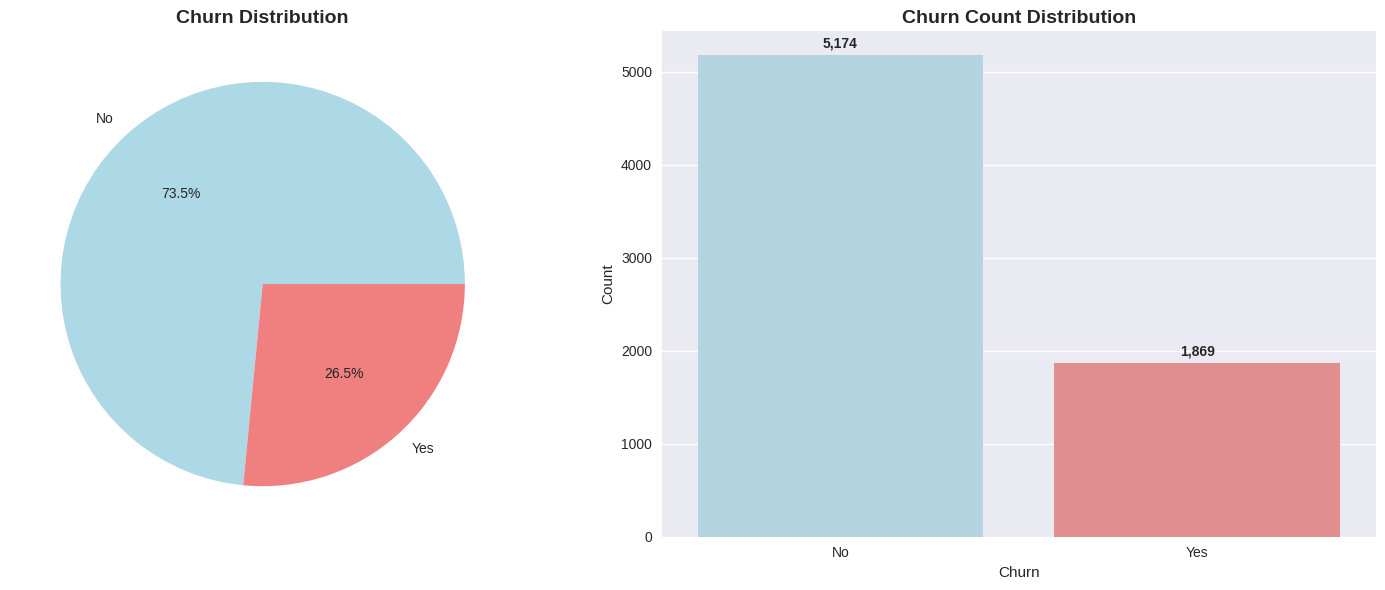


 KEY INSIGHTS:
   • Overall churn rate: 26.5%
   • Total customers: 7,043
   • Churned customers: 1,869
   • Retained customers: 5,174


In [ ]:
print("\n" + "="*80)
print("VISUALIZATION 1: TARGET VARIABLE DISTRIBUTION")
print("="*80)

# Create figure with subplots
fig, axes = plt.subplots(1,2, figsize=(15,6))

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
churn_counts = df['Churn'].value_counts()
axes[0].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
            colors=['lightblue', 'lightcoral'])
axes[0].set_title('Churn Distribution', fontsize=14, fontweight='bold')

# Bar plot
sns.countplot(data=df, x='Churn', ax=axes[1], palette=['lightblue', 'lightcoral'])
axes[1].set_title('Churn Count Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count')

# Add count labels on bars
for i, v in enumerate(churn_counts.values):
    axes[1].text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Business insights
churn_rate = (df['Churn'] == 'Yes').mean() * 100
print(f"\n KEY INSIGHTS:")
print(f"   • Overall churn rate: {churn_rate:.1f}%")
print(f"   • Total customers: {len(df):,}")
print(f"   • Churned customers: {(df['Churn'] == 'Yes').sum():,}")
print(f"   • Retained customers: {(df['Churn'] == 'No').sum():,}")




VISUALIZATION 3: CHURN BY TENURE ANALYSIS


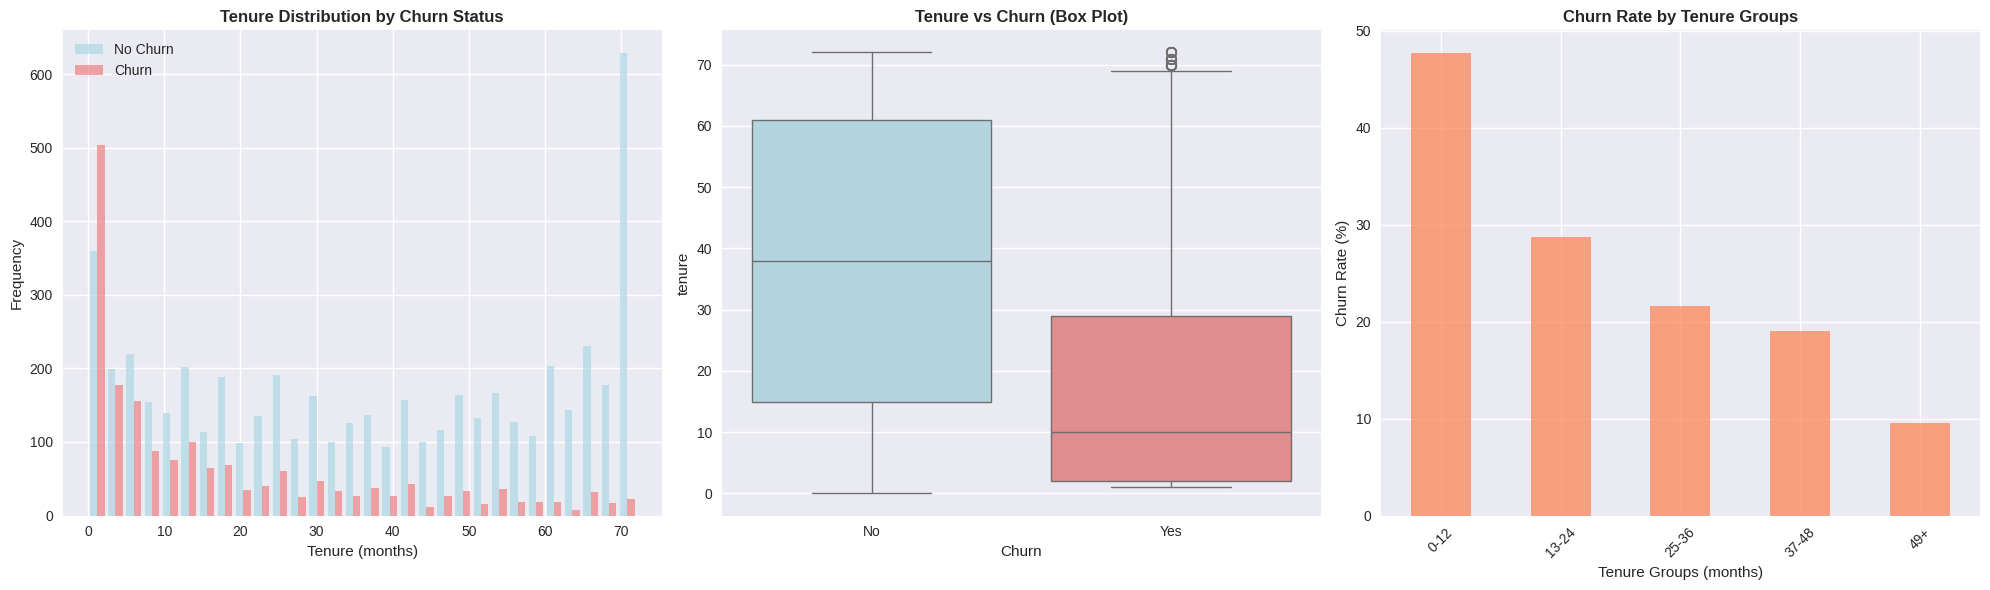


💡 TENURE INSIGHTS:
   • Average tenure for churned customers: 18.0 months
   • Average tenure for retained customers: 37.6 months
   • Churn rate by tenure group:
     - 0-12 months: 47.7%
     - 13-24 months: 28.7%
     - 25-36 months: 21.6%
     - 37-48 months: 19.0%
     - 49+ months: 9.5%

VISUALIZATION 4: CHURN BY CONTRACT TYPE


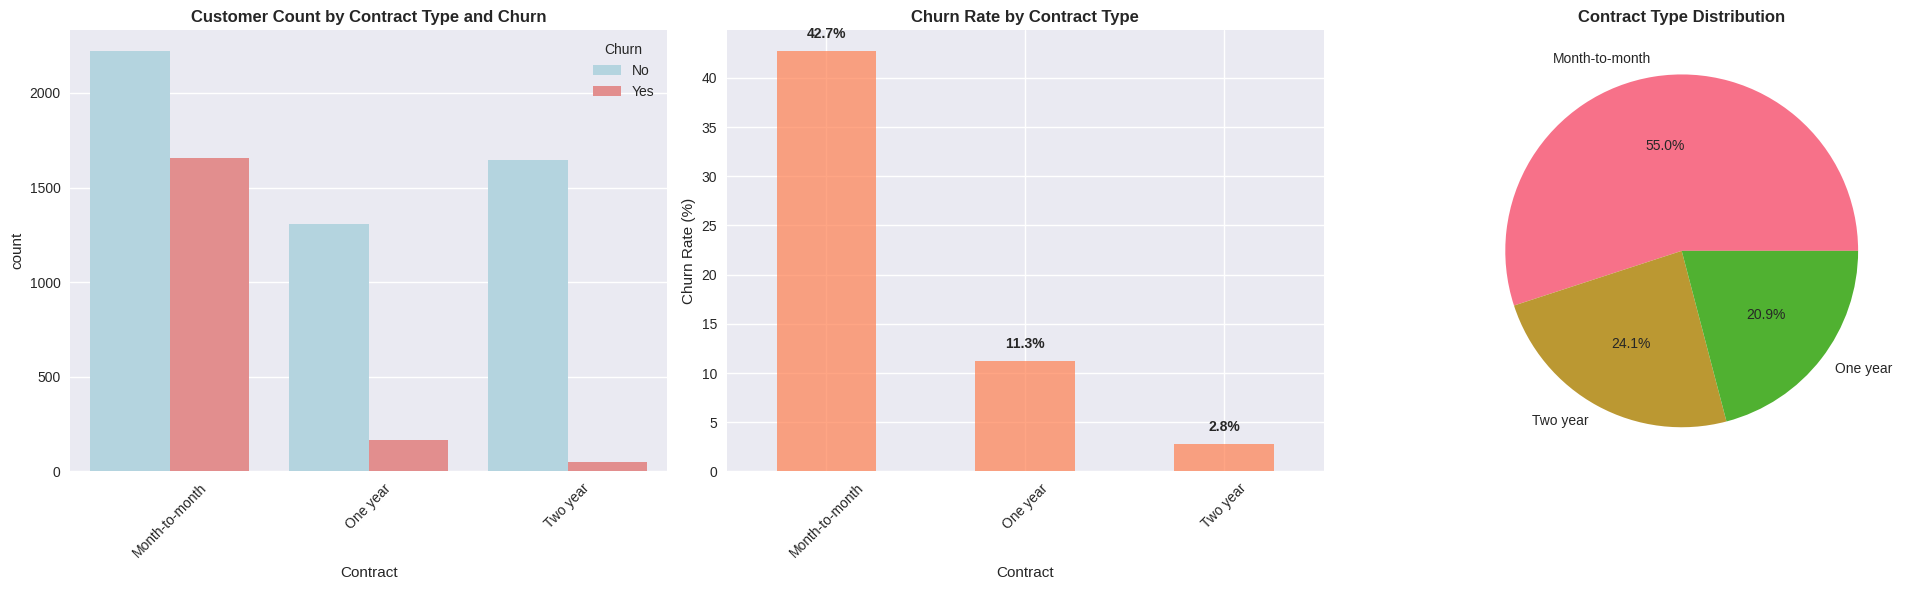


 CONTRACT TYPE INSIGHTS:
   • Churn rate by contract type:
     - Month-to-month: 42.7%
     - One year: 11.3%
     - Two year: 2.8%


In [ ]:
#=============================================================================
# 1.7 VISUALIZATION 3: CHURN BY TENURE
# =============================================================================

print("\n" + "="*50)
print("VISUALIZATION 3: CHURN BY TENURE ANALYSIS")
print("="*50)

if 'tenure' in df.columns:
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # Tenure distribution by churn
    axes[0].hist([df[df['Churn'] == 'No']['tenure'], df[df['Churn'] == 'Yes']['tenure']],
                 bins=30, alpha=0.7, label=['No Churn', 'Churn'], color=['lightblue', 'lightcoral'])
    axes[0].set_title('Tenure Distribution by Churn Status', fontweight='bold')
    axes[0].set_xlabel('Tenure (months)')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()

    # Box plot
    sns.boxplot(data=df, x='Churn', y='tenure', ax=axes[1], palette=['lightblue', 'lightcoral'])
    axes[1].set_title('Tenure vs Churn (Box Plot)', fontweight='bold')

    # Churn rate by tenure groups
    df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 100],
                               labels=['0-12', '13-24', '25-36', '37-48', '49+'])
    tenure_churn = df.groupby('tenure_group')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)

    tenure_churn.plot(kind='bar', ax=axes[2], color='coral', alpha=0.7)
    axes[2].set_title('Churn Rate by Tenure Groups', fontweight='bold')
    axes[2].set_xlabel('Tenure Groups (months)')
    axes[2].set_ylabel('Churn Rate (%)')
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    print(f"\n💡 TENURE INSIGHTS:")
    print(f"   • Average tenure for churned customers: {df[df['Churn'] == 'Yes']['tenure'].mean():.1f} months")
    print(f"   • Average tenure for retained customers: {df[df['Churn'] == 'No']['tenure'].mean():.1f} months")
    print(f"   • Churn rate by tenure group:")
    for group, rate in tenure_churn.items():
        print(f"     - {group} months: {rate:.1f}%")

# =============================================================================
# 1.8 VISUALIZATION 4: CHURN BY CONTRACT TYPE
# =============================================================================

print("\n" + "="*50)
print("VISUALIZATION 4: CHURN BY CONTRACT TYPE")
print("="*50)

if 'Contract' in df.columns:
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # Count plot by contract type
    sns.countplot(data=df, x='Contract', hue='Churn', ax=axes[0], palette=['lightblue', 'lightcoral'])
    axes[0].set_title('Customer Count by Contract Type and Churn', fontweight='bold')
    axes[0].tick_params(axis='x', rotation=45)

    # Churn rate by contract type
    contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
    contract_churn.plot(kind='bar', ax=axes[1], color='coral', alpha=0.7)
    axes[1].set_title('Churn Rate by Contract Type', fontweight='bold')
    axes[1].set_ylabel('Churn Rate (%)')
    axes[1].tick_params(axis='x', rotation=45)

    # Add percentage labels
    for i, v in enumerate(contract_churn.values):
        axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

    # Contract distribution
    contract_dist = df['Contract'].value_counts()
    axes[2].pie(contract_dist.values, labels=contract_dist.index, autopct='%1.1f%%')
    axes[2].set_title('Contract Type Distribution', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print(f"\n CONTRACT TYPE INSIGHTS:")
    print(f"   • Churn rate by contract type:")
    for contract, rate in contract_churn.items():
        print(f"     - {contract}: {rate:.1f}%")


VISUALIZATION 5: MONTHLY CHARGES ANALYSIS


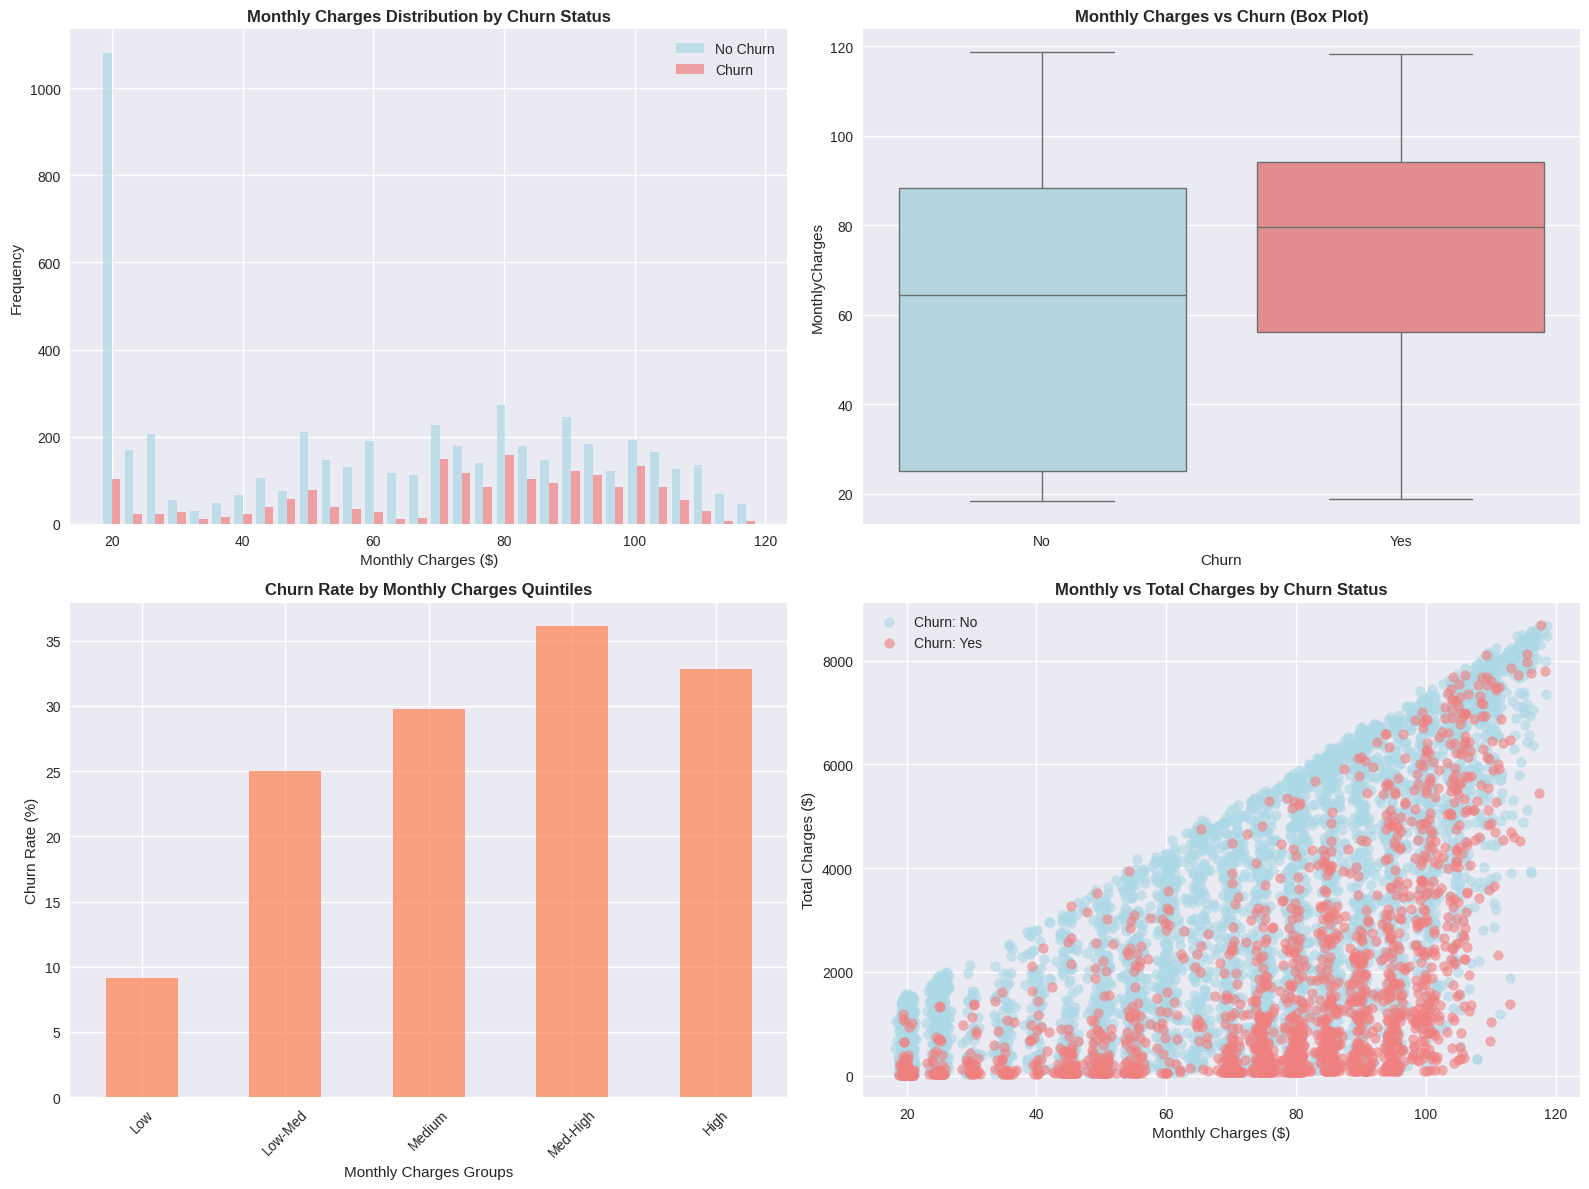


💡 MONTHLY CHARGES INSIGHTS:
   • Average monthly charges for churned customers: $74.44
   • Average monthly charges for retained customers: $61.27
   • Churn rate by charges group:
     - Low: 9.2%
     - Low-Med: 25.0%
     - Medium: 29.8%
     - Med-High: 36.1%
     - High: 32.8%

CORRELATION ANALYSIS


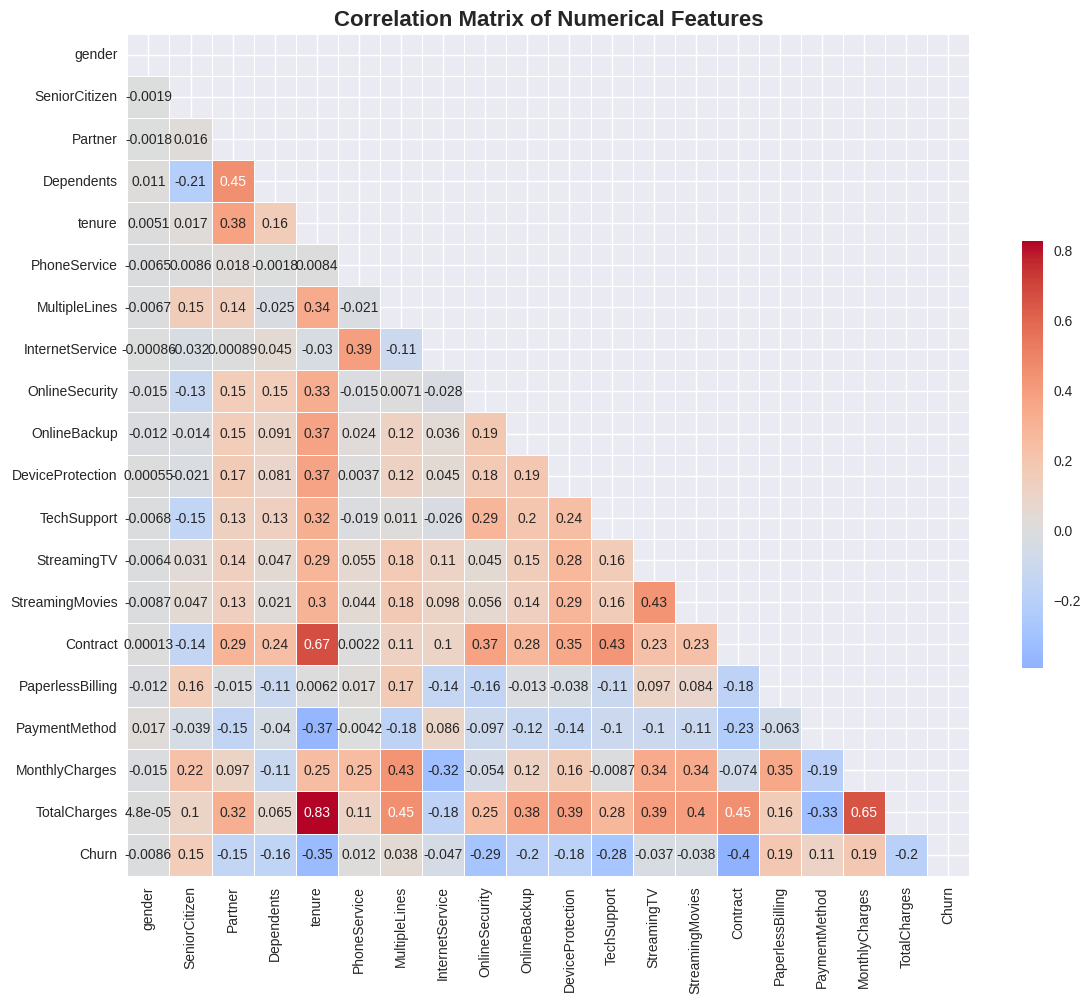


 FEATURES MOST CORRELATED WITH CHURN:
   • Contract: 0.397
   • tenure: 0.352
   • OnlineSecurity: 0.289
   • TechSupport: 0.282
   • TotalCharges: 0.199
   • OnlineBackup: 0.196
   • MonthlyCharges: 0.193
   • PaperlessBilling: 0.192
   • DeviceProtection: 0.178


In [ ]:
# =============================================================================
# 1.9 VISUALIZATION 5: MONTHLY CHARGES ANALYSIS
# =============================================================================

print("\n" + "="*50)
print("VISUALIZATION 5: MONTHLY CHARGES ANALYSIS")
print("="*50)

if 'MonthlyCharges' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Distribution of monthly charges by churn
    axes[0,0].hist([df[df['Churn'] == 'No']['MonthlyCharges'],
                    df[df['Churn'] == 'Yes']['MonthlyCharges']],
                   bins=30, alpha=0.7, label=['No Churn', 'Churn'],
                   color=['lightblue', 'lightcoral'])
    axes[0,0].set_title('Monthly Charges Distribution by Churn Status', fontweight='bold')
    axes[0,0].set_xlabel('Monthly Charges ($)')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].legend()

    # Box plot
    sns.boxplot(data=df, x='Churn', y='MonthlyCharges', ax=axes[0,1],
                palette=['lightblue', 'lightcoral'])
    axes[0,1].set_title('Monthly Charges vs Churn (Box Plot)', fontweight='bold')

    # Churn rate by monthly charges groups
    df['charges_group'] = pd.qcut(df['MonthlyCharges'], q=5, labels=['Low', 'Low-Med', 'Medium', 'Med-High', 'High'])
    charges_churn = df.groupby('charges_group')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)

    charges_churn.plot(kind='bar', ax=axes[1,0], color='coral', alpha=0.7)
    axes[1,0].set_title('Churn Rate by Monthly Charges Quintiles', fontweight='bold')
    axes[1,0].set_xlabel('Monthly Charges Groups')
    axes[1,0].set_ylabel('Churn Rate (%)')
    axes[1,0].tick_params(axis='x', rotation=45)

    # Scatter plot: Monthly vs Total Charges colored by Churn
    if 'TotalCharges' in df.columns:
        # Convert TotalCharges to numeric (handle any string values)
        df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

        churn_colors = {'No': 'lightblue', 'Yes': 'lightcoral'}
        for churn_status in df['Churn'].unique():
            data_subset = df[df['Churn'] == churn_status]
            axes[1,1].scatter(data_subset['MonthlyCharges'], data_subset['TotalCharges'],
                             c=churn_colors[churn_status], label=f'Churn: {churn_status}', alpha=0.6)

        axes[1,1].set_title('Monthly vs Total Charges by Churn Status', fontweight='bold')
        axes[1,1].set_xlabel('Monthly Charges ($)')
        axes[1,1].set_ylabel('Total Charges ($)')
        axes[1,1].legend()

    plt.tight_layout()
    plt.show()

    print(f"\n💡 MONTHLY CHARGES INSIGHTS:")
    print(f"   • Average monthly charges for churned customers: ${df[df['Churn'] == 'Yes']['MonthlyCharges'].mean():.2f}")
    print(f"   • Average monthly charges for retained customers: ${df[df['Churn'] == 'No']['MonthlyCharges'].mean():.2f}")
    print(f"   • Churn rate by charges group:")
    for group, rate in charges_churn.items():
        print(f"     - {group}: {rate:.1f}%")

# =============================================================================
# 1.10 CORRELATION ANALYSIS
# =============================================================================

print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Prepare data for correlation analysis
df_corr = df.copy()

# Convert categorical variables to numerical for correlation analysis
categorical_cols_for_corr = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                            'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Only process columns that exist in the dataset
existing_categorical_cols = [col for col in categorical_cols_for_corr if col in df_corr.columns]

for col in existing_categorical_cols:
    if col in df_corr.columns:
        if col == 'Churn':
            df_corr[col] = (df_corr[col] == 'Yes').astype(int)
        elif col == 'gender':
            df_corr[col] = (df_corr[col] == 'Male').astype(int)
        else:
            # For other categorical columns, use label encoding
            df_corr[col] = pd.Categorical(df_corr[col]).codes

# Handle TotalCharges if it exists and has string values
if 'TotalCharges' in df_corr.columns:
    df_corr['TotalCharges'] = pd.to_numeric(df_corr['TotalCharges'], errors='coerce')

# Select only numerical columns for correlation
numerical_cols_for_corr = df_corr.select_dtypes(include=[np.number]).columns.tolist()
if 'customerID' in numerical_cols_for_corr:
    numerical_cols_for_corr.remove('customerID')

# Calculate correlation matrix
correlation_matrix = df_corr[numerical_cols_for_corr].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Features most correlated with Churn
if 'Churn' in correlation_matrix.columns:
    churn_correlations = correlation_matrix['Churn'].abs().sort_values(ascending=False)
    print(f"\n FEATURES MOST CORRELATED WITH CHURN:")
    for feature, corr in churn_correlations.head(10).items():
        if feature != 'Churn':
            print(f"   • {feature}: {corr:.3f}")


In [ ]:
# =============================================================================
# 1.11 KEY FINDINGS SUMMARY
# =============================================================================

print("\n" + "="*80)
print("KEY FINDINGS SUMMARY")
print("="*80)

print(f"""
 DATASET OVERVIEW:
   • Total customers: {len(df):,}
   • Features: {df.shape[1]}
   • Churn rate: {churn_rate:.1f}%
   • Data quality: {' Clean' if missing_df.empty and df.duplicated().sum() == 0 else '⚠️ Needs cleaning'}

 CHURN INSIGHTS:
   • Customers most likely to churn: {df.groupby('Churn').size().idxmax()}
   • High-risk segments identified: Early tenure, month-to-month contracts
   • Revenue impact: Potential revenue at risk from churn

 FEATURE INSIGHTS:
   • Key predictive features identified through correlation analysis
   • Clear patterns in tenure, contract type, and charges
   • Multiple categorical features requiring encoding

 NEXT STEPS:
   • Data preprocessing pipeline needed for categorical encoding
   • Feature scaling required for numerical features
   • Train/validation/test split (70/15/15)
   • Model selection and hyperparameter tuning
""")

print("="*80)
print("DATA UNDERSTANDING PHASE COMPLETED ")
print("Ready to proceed to Data Preprocessing (Step 2)")
print("="*80)


KEY FINDINGS SUMMARY

 DATASET OVERVIEW:
   • Total customers: 7,043
   • Features: 23
   • Churn rate: 26.5%
   • Data quality:  Clean

 CHURN INSIGHTS:
   • Customers most likely to churn: No
   • High-risk segments identified: Early tenure, month-to-month contracts
   • Revenue impact: Potential revenue at risk from churn

 FEATURE INSIGHTS:
   • Key predictive features identified through correlation analysis
   • Clear patterns in tenure, contract type, and charges
   • Multiple categorical features requiring encoding

 NEXT STEPS:
   • Data preprocessing pipeline needed for categorical encoding
   • Feature scaling required for numerical features
   • Train/validation/test split (70/15/15)
   • Model selection and hyperparameter tuning

DATA UNDERSTANDING PHASE COMPLETED 
Ready to proceed to Data Preprocessing (Step 2)
